# Assignment 1
* 

# Introduction 
* As in the README file.

We use data from a random sample of sales in Copenhagen in 2005. The data is an array over apartments for sold in Copenhagen. Copenhagen is divided in to four different sub-areas KBH K, KBH N, KBH V and KBH OE. 

The data contains different variables such as the number of rooms, floor, toilets, location, m2, price and age. We clean our data-set by removing the variable “building-units” which indicates the number of apartments in the building we are also removing potential outliers by removing prices over 4.000.000 kr. We also create a dummy-variable for the different sub-areas with in Copenhagen so we later in the paper can do a regression-analysis based on the different sub-areas in Copenhagen. This paper focus on learning Python and its applications and training writing code. 
We will therefore not include a theory section in our paper do to limitations on time and space. We will in this paper comment on the results we obtain in our simple data analysis.

Improting libraries and data set:

In [1]:
# Library import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib   # if wanted
from collections import Counter
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import os
cwd = os.getcwd() #getting the working dictanary path.
print(cwd)

C:\Users\jalarsen\Desktop\School\9 semester\01 - Introduction to Program\Assignments\Assignment1


In [2]:
 # imorting a stata file 
infile= pd.read_stata('cphapts.dta')

print(infile.head())

     price  m2  rooms  toilets  floor location  building_units   age
0  2800000  81      3        1      1    KBH K              20  1888
1  1490000  77      2        1      5    KBH K              11  1880
2  1945000  77      2        1      1    KBH K              12  1898
3  2438634  95      4        1      1    KBH K              43  2005
4  1895000  56      1        1      3    KBH K               4  1850


In [3]:
# imorting a stata file 
infile= pd.read_stata('cphapts.dta') 

#removing potential outliers
infile = infile[infile.price < 4000000]
# infile = infile[infile.toilets < 3]
infile = infile.drop('building_units', axis=1)
print(infile.head())

     price  m2  rooms  toilets  floor location   age
0  2800000  81      3        1      1    KBH K  1888
1  1490000  77      2        1      5    KBH K  1880
2  1945000  77      2        1      1    KBH K  1898
3  2438634  95      4        1      1    KBH K  2005
4  1895000  56      1        1      3    KBH K  1850


We prepare the data set by creating dummy variable and change the age from when it was build, to how old it is. Furthermore, we create a new variable, price per square meter.

Finally we use histoframs for a visual inspection.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DA1800DD8>]],
      dtype=object)

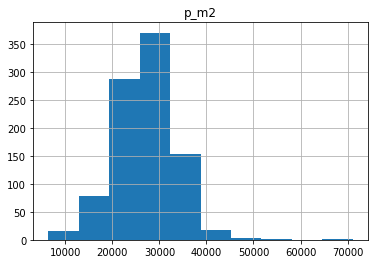

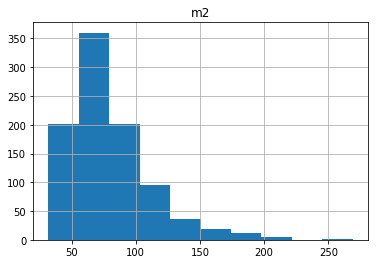

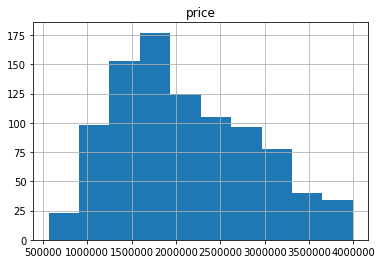

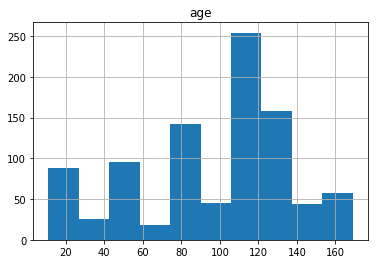

In [4]:
# Cleaning data set
    # Changing buildingyear to age in years
infile['age'] = 2019-infile['age']

    # Creating new variable: Squar meters, p_m2
infile['p_m2'] = infile['price']/infile['m2']

    # Creating a dummy variable for location
infile['locat_dummy'] = infile['location']
locat_dummy = {'KBH K': 1, 'KBH N': 2, 'KBH V': 3, 'KBH OE': 4}
infile.locat_dummy = [locat_dummy[item] for item in infile.locat_dummy]

# Histogram for four parameters
#print(infile)
infile.hist(column='p_m2')
infile.hist(column='m2')
infile.hist(column='price')
infile.hist(column='age')


In the first figure we see the total distribution of the new variable, p_m2, in Copenhagen. On the first axis we have the p_m2, which is price per square meter, and on second axis we have the amount of observations. From figure 3 we see that the largest amount of observations is in the interval 25.000 and 35.000 in the whole of Copenhagen. We will now brake down each sub-area and see how the different variables affect the price and p_m2.

 In the figure below we see the distribution of apartments in the dataset based on the different sub-areas. 

          0
KBH K   202
KBH N   227
KBH V   133
KBH OE  367


Text(0,0.5,'y')

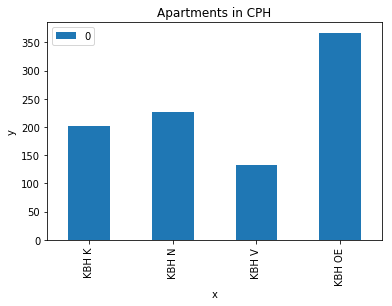

In [5]:
# Histogram of the four areas showing the distribution of observations
a = infile['location']
letter_counts = Counter(a)
b = pd.DataFrame.from_dict(letter_counts, orient='index')
print(b)
b.plot(kind='bar')

plt.title('Apartments in CPH')
plt.xlabel('x')
plt.ylabel('y') 

The total number of observations in the data set is 988 apartments divided in to the four sub-areas as showed in figure 1. We will use this general distribution of apartments and the underlying variables stated earlier in the paper to analyze the effect the different variables’ have on the price pr. Square meter. 





# Heatmaps and Correlation


In the first figure below, we created a heat-map indicating the correlations between the different variables. We have created a heat-map for all the sub-areas and for the whole area to see if there is any difference in correlation between the different sub-areas. The indexations for the correlations are indicated on the right-hand site of the head-map with a bar. Where dark green indicates a correlation close to one and dark red is a correlation close to minus one. A high correlation “close to one “between two variables indicates that they affect each other positive. 

For instance, will the amount of m2 have a positive effect on the price in Copenhagen as a whole. Meaning the more m2 an apartment has the higher the price. In all the heat-maps we need to notice that the price always is positive correlated with the p_m2 and m2 always are negative correlated with the p_m2. This happens because the way we calculate the p_m2. 

We can therefore not conclude anything based on these correlations. In Figure 4 correlation between different variables whole Copenhagen. Here is it worth noticing that both rooms, toilets and floor have a positive effect on the total price of the apartment in whole Copenhagen. We will now brake down the different sub-areas by looking at the heat-maps for each sub-area. 

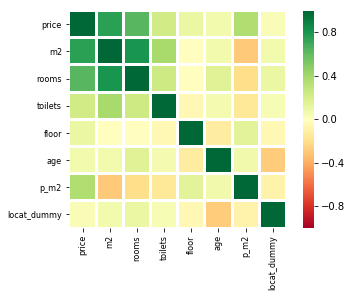

In [6]:
#using supervised learning
#heatmap code
x = infile.corr()

#the correlations between the variables in the data set
ax=sns.heatmap(infile.corr(), square=True, cmap='RdYlGn',vmin=-1,vmax=1, linewidths=2) 
for label in ax.get_yticklabels():
    label.set_size(8)
for label in ax.get_xticklabels():
    label.set_size(8)

For all the sub-areas indicated with below heat-maps we see that rooms, toilets have a positive effect on the total price of the apartments. But we see that rooms and toilets are negative correlated with the p_m2. 
We see that were as prices are positive correlated with toilets and rooms, price per square meter is negative. This means that even though the price of an apartment that has more rooms or toilets is increasing, the marginal effects of more rooms and toilets are decreasing. 

In a perfect market, we would expect that 50 % more rooms or toilets would lead to an increase of 50 % in prices. But this is not the case due to decreasing marginal effects. The reason for this could be that the demand for smaller apartments is higher than the supply, compared to larger apartments. Another explanation can be to which purpose an extra room has in the household. If a resident only has few rooms, they use these rooms more, and thereby requires more space (Livingroom, dining room or bedroom). But if they have many rooms, an extra room is more likely to be considered a luxury and its use will there for be determined thereafter (Yoga room, storage, guestroom).


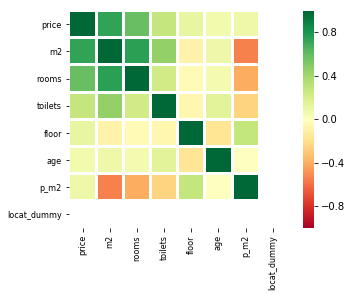

In [7]:
#heatmap for KBH_K 
#subsetting the data
KBH_K = infile[infile['location'].isin(['KBH K'])]
KBH_Kc = KBH_K.corr()

#the correlations between the variables in the data set
ax1=sns.heatmap(KBH_K.corr(), square=True, cmap='RdYlGn', vmin=-1,vmax=1,linewidths=2)
for label in ax1.get_yticklabels():
    label.set_size(8)
for label in ax1.get_xticklabels():
    label.set_size(8)

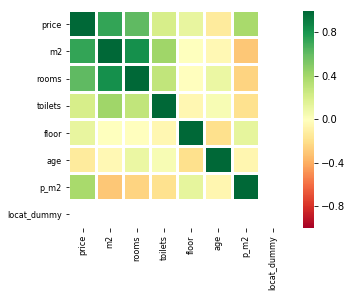

In [8]:
#heat map for KBH OE
KBH_OE = infile[infile['location'].isin(['KBH OE'])]
KBH_OEc = KBH_OE.corr()

#the correlations between the variables in the data set
ax2=sns.heatmap(KBH_OE.corr(), square=True, cmap='RdYlGn',vmin=-1,vmax=1,linewidths=2)
for label in ax2.get_yticklabels():
    label.set_size(8)
for label in ax2.get_xticklabels():
    label.set_size(8)

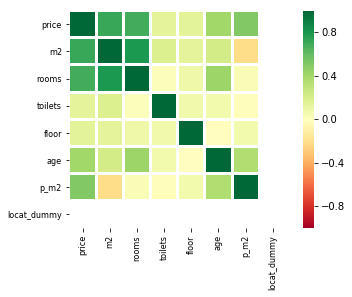

In [9]:
#heatmap for KBH_N
KBH_N = infile[infile['location'].isin(['KBH N'])]
KBH_Nc = KBH_N.corr()

#the correlations between the variables in the data set
ax3=sns.heatmap(KBH_N.corr(), square=True, cmap='RdYlGn', vmin=-1,vmax=1,linewidths=2)
for label in ax3.get_yticklabels():
    label.set_size(8)
for label in ax3.get_xticklabels():
    label.set_size(8)

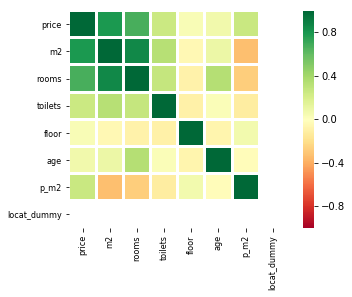

In [10]:
#heatmap for KBH_V
KBH_V = infile[infile['location'].isin(['KBH V'])]
KBH_Vc = KBH_V.corr()

#the correlations between the variables in the data set
ax4=sns.heatmap(KBH_V.corr(), square=True, cmap='RdYlGn',vmin=-1,vmax=1,linewidths=2)
for label in ax4.get_yticklabels():
    label.set_size(8)
for label in ax4.get_xticklabels():
    label.set_size(8)

# Regression analysis of our data set and introduction to Machine Learning

### Introduction to Machine Learning (Supervised)
In this section we will use regression and machine learning to analysis the data set and create a model on the variables in order to determine its prediction abilities. 

In this part we will give a short introduction to machine learning. Machine learning is teaching the machine to predict the outcome, based on a model and parameters. Machine learning can be both supervised and unsupervised. The difference is whether or not we provide the results to the training or not. In this analysis, we will try to get the machine to predict the prices of apartments in Copenhagen, based on the data set. Since the prices are already in the data set, we are able to test the prediction against real data. This is therefor a supervised machine learning. 

We will use both multiple and simple regression to make our prediction in order to examine the data set. We will be looking at two factors. First we will look at which parameters are significant, and secondly we will try to determine how significant the each parameter is. This will be done through regressive machine learning.

In order to teach the machine, we need to give the machine data to train on. But since we also want to test the training, we also need a data set to test it on. If we gave the machine the same data set to train and test on, we would create a model, that predicted 100 %, since the machine would already know the outcome. We therefor need to split the data set and make sure that the data in the training set was not the data in the test. Otherwise we would be cheating. 

How to split the data set depends on the size of the data set. We want the machine to have as much data as possible to train on, so that it learns as much as possible, but we also want some data to test on. And the test data needs to be big enough so that the result becomes valid, remember Law of Large Numbers. 
The bigger the data set, the smaller percentage of the data set is necessary for testing. It is therefor a trade of between how precise the model becomes and how sure we can be of the result.


### Regression analysis
On the cleaned data we get a bell-like shape of the distribution of prices across the four areas in Copenhagen. This means that we can assume normal-distribution in order to make our regression analysis. 

In this data analysis we use simple linear regression on the data set, with prices being our dependent variable, and all other variables being independent. This will be the setting of the variables throughout the regression section. 

Furthermore since location is a string, this variable has been left out. Also price per square meter is per construction not a valid parameter to run as an independent variable on price. Therefor these three parameters have been removed from the dataframe before we do any regression. We continue the regression analysis of the data set using the six variables, 'm2', 'rooms', 'toilets', 'floor', 'age', 'locat_dummy'.


## Regression - Part 1: Visual analysis

In this section we make a visual analysis in of the six selected variables. We make a simple scatterplot of each parameter on the first axis and price/price per square meters on the secondary axis. Since price per square meter includes square meters in construction, this visualization is not made.  
The plots made with prices are given a red color, and plots with prices per square meters on the Y-axis is blue.


In [11]:
# Creating individual dataframes for the variables
df = pd.DataFrame(infile,columns=['price','m2', 'rooms','toilets', 'floor' , 'age', 'location' , 'p_m2', 'locat_dummy'])

X_m2 = df[['m2']]
X_r = df[['rooms']]
X_t = df[['toilets']]
X_f = df[['floor']]
X_a = df[['age']]
X_l = df[['locat_dummy']]

y = df[['price']]
y2 = df[['p_m2']]

In [12]:
print(len(df))

929


Sqr.meters


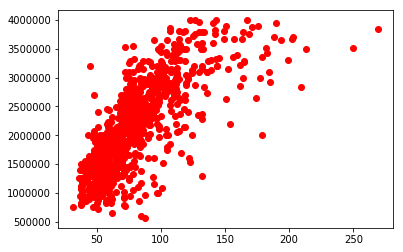

In [13]:
# Create the regressor and visual distribution for square meters
reg = LinearRegression()
    
# M^2
print('Sqr.meters')
plt.scatter(X_m2, y, color='red')
plt.show()


If we look at the scatterplot of square meters, we se a clear trend. More square meters, leads to higher prices. Since we removed all data above 4.000.000 kr. It is unclear whether or not the plots on the fare right are outliers or indicators of decreasing marginal effects on square meters. 

Rooms


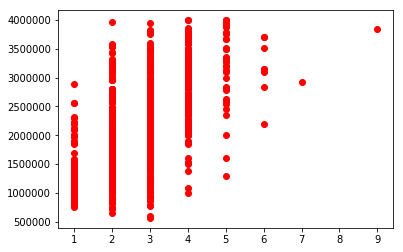

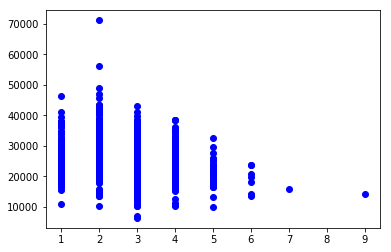

In [14]:
# Creating visual distribution for Rooms
print('Rooms')
# y=Price
plt.scatter(X_r, y, color='red')
plt.show()
# y=P_M2
plt.scatter(X_r, y2, color='blue')
plt.show()

For number of rooms in the first plot, we see a positive correlation. This means that more rooms in general means higher price. Often more rooms also indicate more space, which therefor is similar to the plot for square meters.
If we then look at the blue plot for rooms, which shows the correlation between number of rooms and the price per square meter, we see that apartments with two and three has the highest variance. Furthermore we see that the apartments with the highest prices per square meter is the 1 to 3 rooms apartments. The downward trend that we observe on the most expensive square meters underlines what we observed in the heatmap above, but as we also see, the cheapest square meter is located in the three-room category. Furthermore the trend of the least expensive square meters is horizontal or slightly upward going. Therefor any definitive correlation is difficult to conclude here. 


Toilets


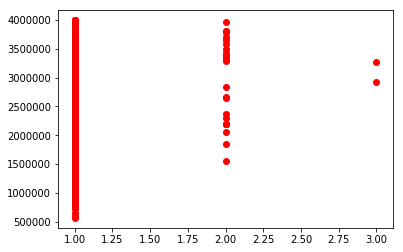

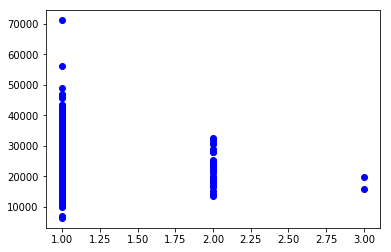

In [15]:
# Creating visual distribution for Toilets
print('Toilets')
# y=Price
plt.scatter(X_t, y, color='red')
plt.show()
# y=P_M2
plt.scatter(X_t, y2, color='blue')
plt.show()

With regard to number of toilets, the outcome of the plots are very similar to the one with rooms. More toilets indicate bigger apartments, which again indicates higher prices. And the most expensive square meters are in the apartments with only one. Additionally only two observations are made with three toilets, which makes us question if we can do any analysis on this variable.

Rooms/M2


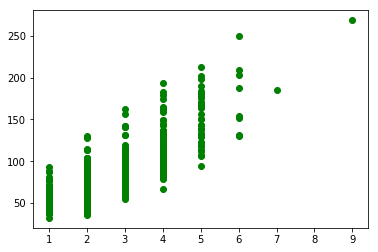

Toilets/M2


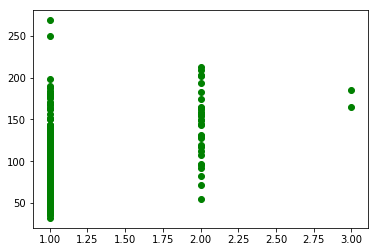

In [16]:
# Creating visual distribution for rooms and toilets on M2
print('Rooms/M2')
plt.scatter(X_r, X_m2, color='green')
plt.show()
print('Toilets/M2')
plt.scatter(X_t, X_m2, color='green')
plt.show()

Clear trend between Rooms and Square meters, which means that these two variables are highly correlated. Similiar trend between number of toilets and square meters. But with toilet only being between 1 and 3, the trend is less clear.

Floor


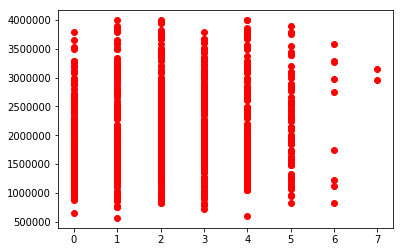

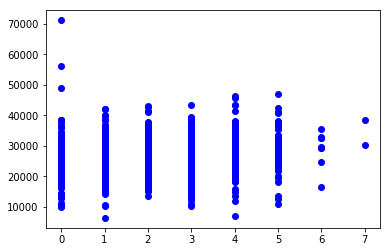

In [17]:
# Creating visual distribution for Floor
print('Floor')
# y=Price
plt.scatter(X_f, y, color='red')
plt.show()
# y=P_M2
plt.scatter(X_f, y2, color='blue')
plt.show()

Looking at floors, we see a different picture that when we looked at toilets and rooms. Here we see no real trend in which floor an apartment is located on and the total price. Especially if we do not include the two observations located on the seventh floor. 

But if we look at the blue plot with square meter prices, we see an upward going trend for the highest priced square meters. This indicates that people in Copenhagen wish to live as high above the ground as possible. This makes sense if we think that apartments located closest to the ground get more noise from the street, gets less light from the sun and experience more break-ins.

Also for the apartments with the lowest price per square meter, do we see an upward going trend for the apartments from the groundfloor and up the next two floors. Then the trend goes down for the next two floors, only to again go up the last three floors. A qualified guess to why this is, is that the lest expensive square meters are located in buildings that do not have elevators. If we assume that the overall interest is to live as high as possible, then we get to the third floor before the challenges with walking up the stairs overcome the interest to live as high as possible. In building with six, seven and eight floors, elevators are often implemented, why we again here see an upward going trend. 

Age


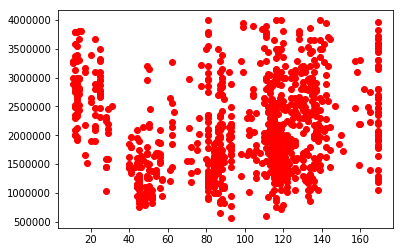

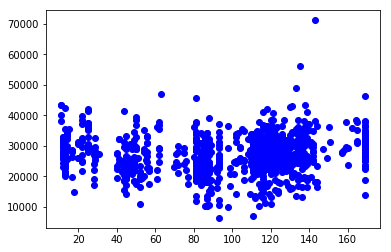

In [18]:
# Creating visual distribution for Age
print('Age')
# y=Price
plt.scatter(X_a, y, color='red')
plt.show()
# y=P_M2
plt.scatter(X_a, y2, color='blue')
plt.show()

Age of the building does not seem to have any visual effect on the price or the price per square meter.


Location


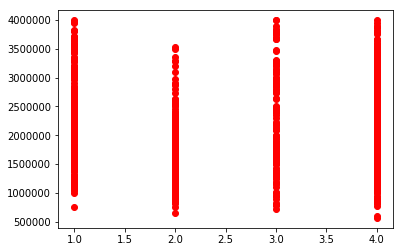

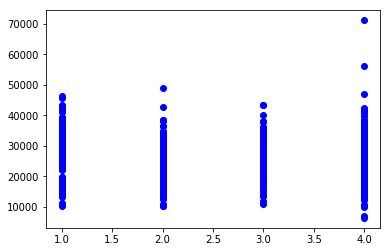

In [19]:
# Creating visual distribution for Location
print('Location')
# y=Price
plt.scatter(X_l, y, color='red')
plt.show()
# y=P_M2
plt.scatter(X_l, y2, color='blue')
plt.show()

Looking at location, we get the indication that people is willing to pay more for an apartment in Dummy 1 and 3, which are Copenhagen central (KBH K) and Copenhagen West (KBH V). However Copenhagen North (KBH N) looks slightly cheaper than the others and Copenhagen East (KBH OE) has the highest spread.


## Regression - Part 2: OLS

In this section, we will be running multiple and simple regressions on the data set to determine if any of the parameters are significant for the price of apartments in Copenhagen. We do this with a basic OLS regression.  

First of we remove location dummy and floor from the data set. Even though both variables seemed to have influence on prices in part 1, we cannot run regression on category variables, why the simplest solution is to remove them all together. 


In [20]:
# OLS regression on Age, Squar-meters, Rooms and Toilets
Y = y
X = df[['m2', 'age','rooms','toilets']]
model=sm.OLS(Y, X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                 -188736.700
Model:                            OLS   Adj. R-squared:            -189552.863
Method:                 Least Squares   F-statistic:                    -231.2
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               1.00
Time:                        12:14:39   Log-Likelihood:                -13542.
No. Observations:                 929   AIC:                         2.709e+04
Df Residuals:                     925   BIC:                         2.711e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m2          1.724e+04    986.802     17.468      0.000    1.53e+04    1.92e+04
age         1394.6811    402.342      3.466      0.001     605.073    2184.290
rooms       8.543e+04   2.84e+04      3.005      0.003    2.96e+04    1.41e+05
toilets     3.337e+05   5.71e+04      5.845      0.000    2.22e+05    4.46e+05
==============================================================================
Omnibus:                       62.912   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.778
Skew:                          -0.408   Prob(JB):                     1.21e-30
Kurtosis:                       4.701   Cond. No.                         441.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Running the multiple regression on the data set of now four variables, we see that all four variables are significant and positive correlated with prices. 

In section 1 we discussed how rooms and toilets are highly dependent on square meters, so we can take out rooms and toilets and run the regression again. This lowers the variance and increase the significance of the model. See below.


In [21]:
# OLS regression on Age and Squar-meters
Y = y
X = df[['m2', 'age']]
model=sm.OLS(Y, X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                 -197641.685
Model:                            OLS   Adj. R-squared:            -198068.098
Method:                 Least Squares   F-statistic:                    -463.5
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               1.00
Time:                        12:14:39   Log-Likelihood:                -13564.
No. Observations:                 929   AIC:                         2.713e+04
Df Residuals:                     927   BIC:                         2.714e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m2          2.216e+04    405.821     54.615      0.000    2.14e+04     2.3e+04
age         2991.3267    328.808      9.097      0.000    2346.031    3636.622
==============================================================================
Omnibus:                      109.957   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.988
Skew:                          -0.609   Prob(JB):                     2.18e-67
Kurtosis:                       5.539   Cond. No.                         3.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We then run simple regression on each of the two parameters and see that both also are significant.

In [22]:
# OLS regression on Squar meters alone
Y = y
X = X_m2
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                 -215287.542
Model:                            OLS   Adj. R-squared:            -215519.534
Method:                 Least Squares   F-statistic:                    -928.0
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               1.00
Time:                        12:14:39   Log-Likelihood:                -13603.
No. Observations:                 929   AIC:                         2.721e+04
Df Residuals:                     928   BIC:                         2.721e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m2          2.536e+04    212.311    119.438      0.000    2.49e+04    2.58e+04
==============================================================================
Omnibus:                      217.517   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              751.761
Skew:                          -1.102   Prob(JB):                    5.72e-164
Kurtosis:                       6.817   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# OLS regression on Age alone
Y = y
X = X_a
model=sm.OLS(Y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                 -833601.521
Model:                            OLS   Adj. R-squared:            -834499.800
Method:                 Least Squares   F-statistic:                    -928.0
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               1.00
Time:                        12:14:39   Log-Likelihood:                -14232.
No. Observations:                 929   AIC:                         2.847e+04
Df Residuals:                     928   BIC:                         2.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age         1.853e+04    338.494     54.735      0.000    1.79e+04    1.92e+04
==============================================================================
Omnibus:                       82.200   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.245
Skew:                           0.788   Prob(JB):                     6.28e-23
Kurtosis:                       3.397   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression - Part 3: Machine Learning and prediction

In this section, we will use our experience from part 2 to see how well our model can predict prices based on the two selected parameters, square meters and age. 

Since we already have the prices, we can use the theory of supervised machine learning to estimate a regression model that can predict prices of apartments in Copenhagen. 

First of we split the data set into a training set and a test set. We chose 75/25 split due to the size of the data set. We have chosen to evaluate the success of the prediction, by using an R-squared score test and a Root mean squared error test.


In [24]:
# Create training and test sets for ML
X = df[['m2', 'age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print(X_train.head())
print(X_test.head())

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

      m2  age
823   85  114
445  100  114
64   132  134
353  156  120
327   55   86
     m2  age
799  73   20
709  61  115
32   69   62
411  71   44
212  45  138
R^2: 0.649245117092986
Root Mean Squared Error: 443199.16779858695


We find that running this regression, with square meters and age as variables, that we get a model where R-squared reaches almost 0,65. Even though we cannot translate that directly into a percentage score of how much it predicts correctly, we can say that our model has some prediction strength. 


In [25]:
# Create training and test sets for ML
X = df[['m2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6483995468641675
Root Mean Squared Error: 443733.0597759655


In [26]:
# Create training and test sets for ML
X = df[['age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.008618400542428017
Root Mean Squared Error: 745105.0388895362


## Conclution
We then run the model on both parameters separately and find that square meters have almost all the prediction power, 0,65, and age have very little, 0,01. 

If we look at this result, it makes sense that people will pay more for more space, and the age of the building has very little influence. But is a little surprising, that older buildings cost more, than younger building. This however could be due to other reasons, such as location or size.
